In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pystan

In [4]:
data = np.array([0,0,0,1,1,1,1,1,1,1])
y = np.sum(data)
N = data.shape[0]

c:\Users\ken12\anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


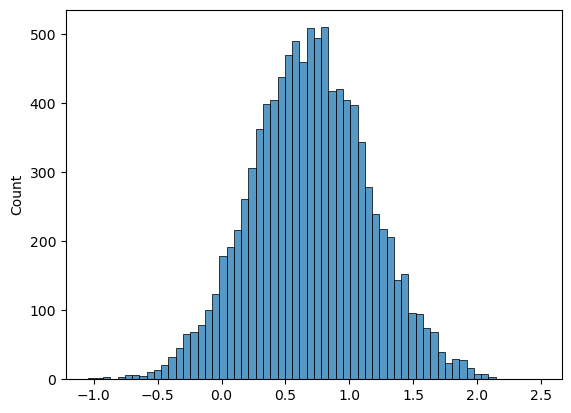

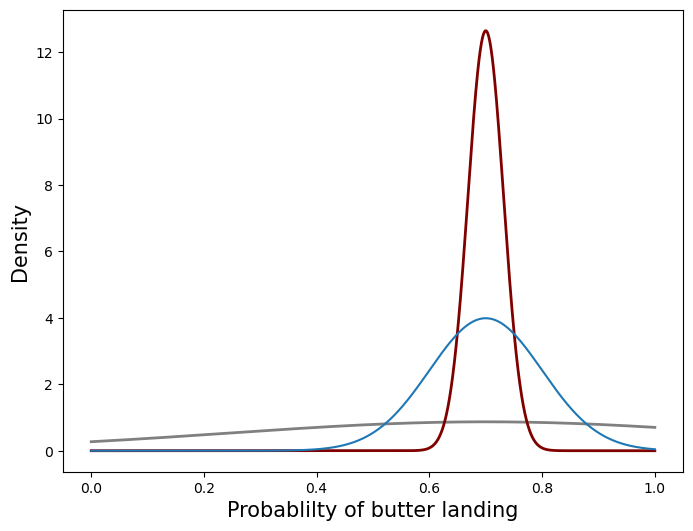

In [5]:
# choose priors
mu_0=data.mean()
sigma_0=data.std()
sigma_likelihood=0.1

prior = stats.norm(loc=mu_0,scale=sigma_0)

likelihood = stats.norm(loc=y/N, scale=sigma_likelihood)

# Calculate the posterior distribution
posterior_mean = (sigma_likelihood**2 * mu_0 + N * sigma_0**2 * (y/N)) / (N * sigma_0**2 + sigma_likelihood**2)
posterior_var = 1 / (1 / sigma_0**2 + N / sigma_likelihood**2)
posterior = stats.norm(loc=posterior_mean, scale=np.sqrt(posterior_var))


x = np.linspace(0, 1, 10000)

prior_density = prior.pdf(x)
likelihood_density=likelihood.pdf(x)
posterior_density = posterior.pdf(x)


sns.histplot(prior.rvs(10000))

f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, prior_density, color='grey', lw=2, label='Prior of')

ax.plot(x, posterior_density, color='maroon', lw=2, label='Posterior of theta')

ax.plot(x, likelihood_density, label='Likelihood')

ax.set_xlabel('Probablilty of butter landing', fontsize=15)
ax.set_ylabel('Density', fontsize=15)

f.show()